#### Fit a linear model on credit data set predicting balance from other variables.

1. Build the linear model, fit it on data and print the summary of the errors
2. Comment which variables looks significant and which does not. 
3. Based on observations from the previous point, find a smaller regression model which has the same coefficient of determination and uses less variables for prediction. 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as spst

import seaborn as sns


%matplotlib inline
plt.style.use('seaborn-white')
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
credit = pd.read_csv('credit.csv')

In [5]:
credit.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


##### Build the linear model, fit it on data and print the summary of the errors

#### Simple Linear Regression 𝑦=𝛽0+𝛽1𝑥1+𝜖
a) Sa vedem in ce masura Balance depinde de Venit:

In [59]:
lm1 = smf.ols('Balance~Income', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           1.03e-22
Time:                        21:06:31   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observam ca p-val (sigma) este foarte mic, deci Venitul este semnificativ pentru Balance

b) Sa vedem in ce masura Balance depinde de Educatie:

In [57]:
lm2 = smf.ols('Balance ~ Education', credit).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02587
Date:                Wed, 13 Nov 2019   Prob (F-statistic):              0.872
Time:                        21:01:51   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    535.9662    101.814      5.264      0.000     335.805     736.127
Education     -1.1860      7.374     -0.161      0.872     -15.683      13.311
==============================================================================
Omnibus:                       28.655   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.467
Skew:                           0.584   Prob(JB):                     1.09e-06
Kurtosis:                       2.467   Cond. No.                         61.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observam ca p-val (sigma) = 0.872 > (riscul) alfa= 0.05, deci Educatia nu este semnificativ pentru Balance

c)Sa vedem si cateva grafice, din care putem sa tragem cateva concluzii:

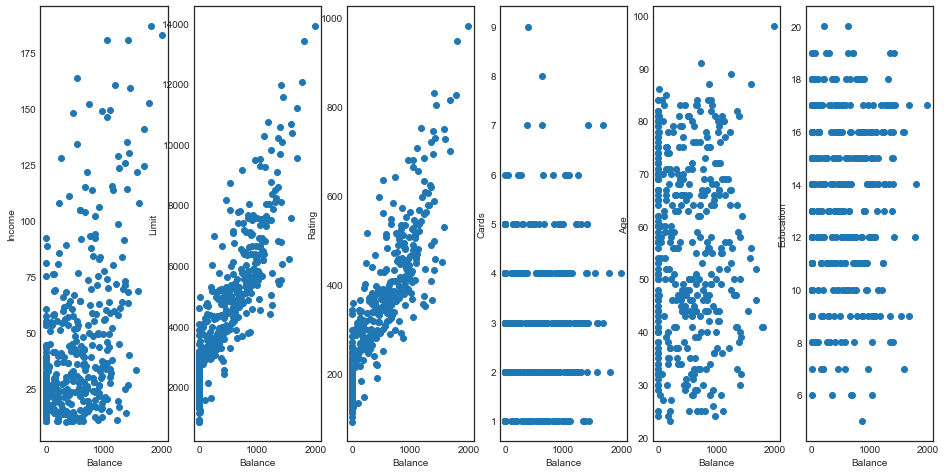

In [26]:
plt.subplot(161)
plt.scatter(credit['Balance'], credit['Income'])
plt.xlabel('Balance')
plt.ylabel('Income')

plt.subplot(162)
plt.scatter(credit['Balance'], credit['Limit'])
plt.xlabel('Balance')
plt.ylabel('Limit')

plt.subplot(163)
plt.scatter(credit['Balance'], credit['Rating'])
plt.xlabel('Balance')
plt.ylabel('Rating')

plt.subplot(164)
plt.scatter(credit['Balance'], credit['Cards'])
plt.xlabel('Balance')
plt.ylabel('Cards')

plt.subplot(165)
plt.scatter(credit['Balance'], credit['Age'])
plt.xlabel('Balance')
plt.ylabel('Age')

plt.subplot(166)
plt.scatter(credit['Balance'], credit['Education'])
plt.xlabel('Balance')
plt.ylabel('Education')

plt.show()

##### Interpretare: La prima vedere, putem spune sigur ca Income, Limit si Rating sunt semnificative pentru variatia lui Balance

             Income     Limit    Rating     Cards       Age  Education  \
Income     1.000000  0.792088  0.791378 -0.018273  0.175338  -0.027692   
Limit      0.792088  1.000000  0.996880  0.010231  0.100888  -0.023549   
Rating     0.791378  0.996880  1.000000  0.053239  0.103165  -0.030136   
Cards     -0.018273  0.010231  0.053239  1.000000  0.042948  -0.051084   
Age        0.175338  0.100888  0.103165  0.042948  1.000000   0.003619   
Education -0.027692 -0.023549 -0.030136 -0.051084  0.003619   1.000000   
Balance    0.463656  0.861697  0.863625  0.086456  0.001835  -0.008062   

            Balance  
Income     0.463656  
Limit      0.861697  
Rating     0.863625  
Cards      0.086456  
Age        0.001835  
Education -0.008062  
Balance    1.000000  


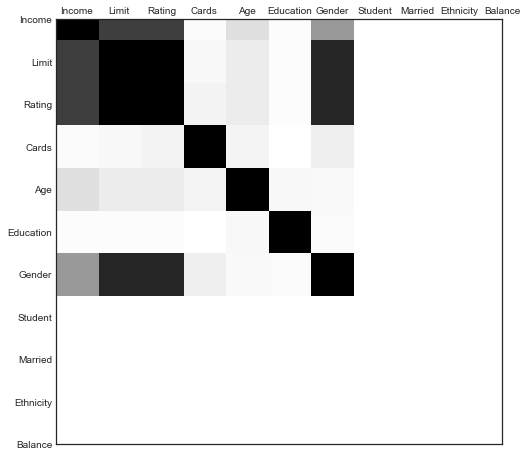

In [60]:
# sa vedem si corelatia dintre variabile

plt.matshow(credit.corr())
plt.xticks(range(len(credit.columns)), credit.columns)
plt.yticks(range(len(credit.columns)), credit.columns)

print(credit.corr())

##### Interpretare: Se observa o corelatie buna intre: Income, Limit, Rating cu Balance

In [38]:
# How well Income predicts Balance
#REGRESIA LINIARA PT Income, pv mic => b semnificativ
lm3 = smf.ols('Balance ~ Income', data=credit).fit()
print(lm3.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187


#### => Income variabila semnificativa in variatia lui Balance

In [62]:
# How well Limit predicts Balance
#REGRESIA LINIARA PT Limit
lm4 = smf.ols('Balance ~ Limit', data=credit).fit()
print(lm4.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -292.7905     26.683    -10.973      0.000    -345.249    -240.332
Limit          0.1716      0.005     33.879      0.000       0.162       0.182


#### => Limit variabila semnificativa in variatia lui Balance

In [63]:
# How well rating predicts Balance
lm5 = smf.ols('Balance ~ Rating', data=credit).fit()
print(lm5.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714


#### => Rating variabila semnificativa in variatia lui Balance

In [64]:
# How well Cards predicts Balance
lm6 = smf.ols('Balance ~ Cards', data=credit).fit()
print(lm6.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.2861     54.569      7.958      0.000     327.006     541.566
Cards         28.9869     16.743      1.731      0.084      -3.929      61.903


#### (pv = 0.084) > 0.05 => Cards nu este variabila semnificativa in variatia lui Balance

In [65]:
# How well Age predicts Balance
lm7 = smf.ols('Balance ~ Age', data=credit).fit()
print(lm7.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.2922     77.852      6.645      0.000     364.241     670.344
Age            0.0489      1.336      0.037      0.971      -2.578       2.675


#### (pv=0.971) > 0.05 => Age nu este variabila semnificativa in variatia lui Balance

In [66]:
# How well Education predicts Balance
lm8 = smf.ols('Balance ~ Education', data=credit).fit()
print(lm8.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    535.9662    101.814      5.264      0.000     335.805     736.127
Education     -1.1860      7.374     -0.161      0.872     -15.683      13.311


#### ( pv=0.872 ) > 0.05 => Education nu este variabila semnificativa in variatia lui Balance

In [44]:
# How well Gender predicts Balance
lm9 = smf.ols('Balance ~ Gender', data=credit).fit()
print(lm9.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        529.5362     31.988     16.554      0.000     466.649     592.423
Gender[T.Male]   -19.7331     46.051     -0.429      0.669    -110.267      70.801


#### ( pv=0.669 ) > 0.05 => Gender nu este variabila semnificativa in variatia lui Balance

In [67]:
# How well Student predicts Balance
lm10 = smf.ols('Balance ~ Student', data=credit).fit()
print(lm10.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140


#### ( pv=0.000 ) < 0.05 => Student variabila semnificativa in variatia lui Balance

In [68]:
# How well Married predicts Balance
lm11 = smf.ols('Balance ~ Married', data=credit).fit()
print(lm11.summary().tables[1])



                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        523.2903     36.974     14.153      0.000     450.601     595.980
Married[T.Yes]    -5.3475     47.244     -0.113      0.910     -98.227      87.532


#### ( pv=0.910 ) > 0.05 => Married nu este variabila semnificativa in variatia lui Balance

In [69]:
# How well Ethnicity predicts Balance
lm12 = smf.ols('Balance ~ Ethnicity', data=credit).fit()
print(lm12.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930


#### pv mare => Ethnicity nu este variabila semnificativa in variatia lui Balance

### Construim modelul de regresie liniara multipla cu toate variabilele independente din tabel

In [71]:
lm4= smf.ols('Balance ~ Income+Limit+Rating+Cards+Age+Education+Gender+Student+Married+Ethnicity', data=credit).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 13 Nov 2019   Prob (F-statistic):          1.11e-253
Time:                        21:33:22   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -489

#### Din tabel, observam ca avem coeficientul de determinare = 0.955 dar si ca variabilele independente Gender, Married, Ethnicity si Education nu sunt semnificative pt model

#### Cnstruim un model de regresie liniara multipla cu mai putine variabile independente:

In [72]:
lm5= smf.ols('Balance ~ Income+Limit+Rating+Cards+Age+Student', data=credit).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):          1.58e-260
Time:                        21:38:01   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -493.7342     24.825    -19.

#### Am construit un nou model care are coeficientul de determinare ca modelul vechi , R-squared =0.955 